# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [ ]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [ ]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath =  '/content/drive/My Drive/Colab Notebooks/Datasets/Wine_Quality_Data.csv'

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv(filepath, sep=',')

In [ ]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

In [ ]:
sns.pairplot(data, hue='color')

Output hidden; open in https://colab.research.google.com to view.

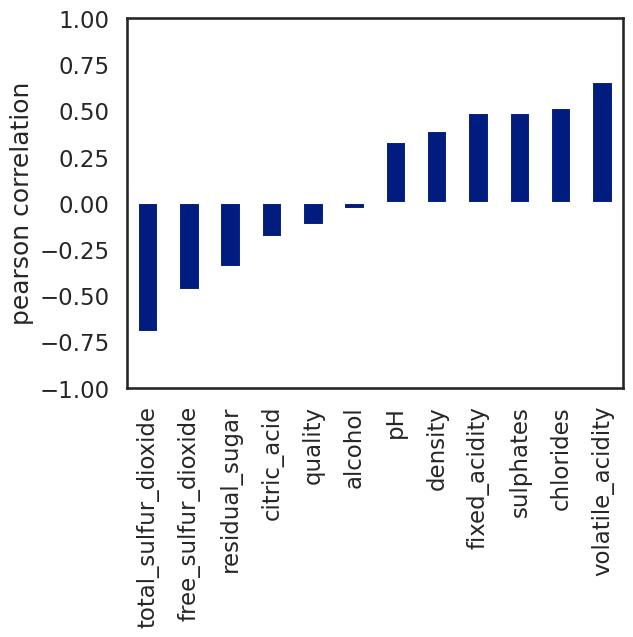

In [ ]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [ ]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


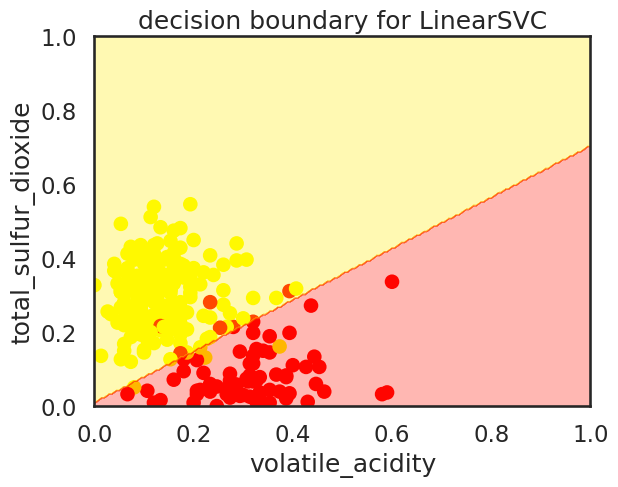

In [ ]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [ ]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

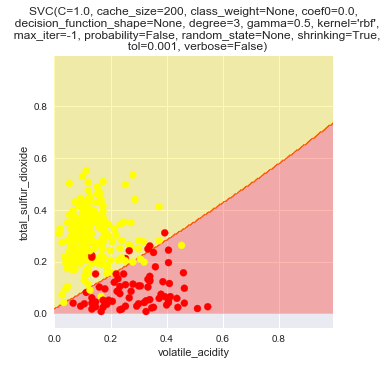

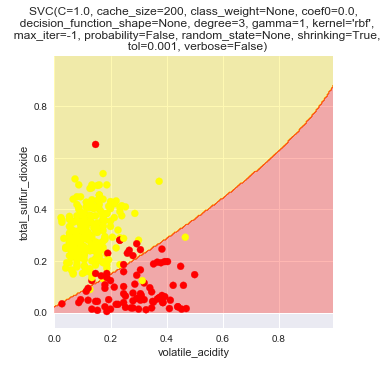

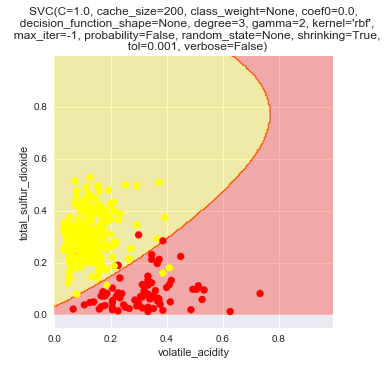

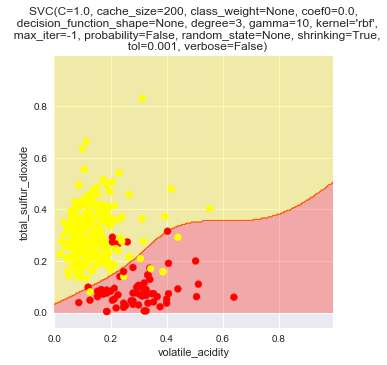

In [ ]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

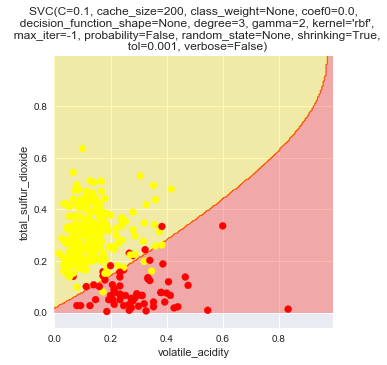

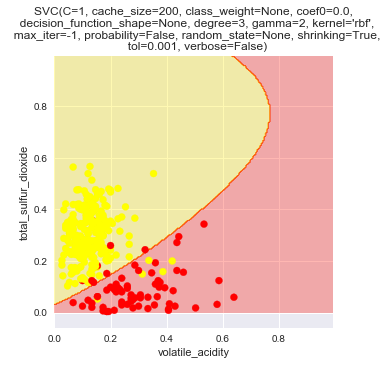

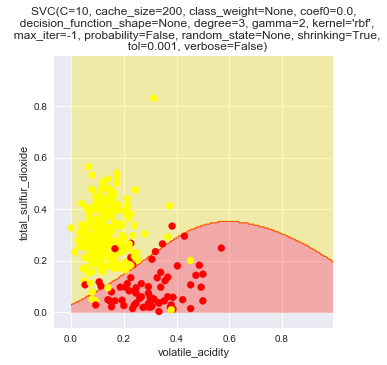

In [ ]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [ ]:
%%timeit
svc.fit(X, y)

1 loop, best of 3: 1.48 s per loop


In [ ]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

10 loops, best of 3: 44.6 ms per loop


In [ ]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [ ]:
%timeit svc.fit(X2, y2)

1 loop, best of 3: 17.6 s per loop


In [ ]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

10 loops, best of 3: 145 ms per loop


# Discussion 10.1 | Support Vector Machines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath =  '/content/drive/My Drive/Colab Notebooks/Datasets/Wine_Quality_Data.csv'

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv(filepath, sep=',')

Training time: 0.0077 seconds
Training accuracy: 0.9573
Validation accuracy: 0.9446



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


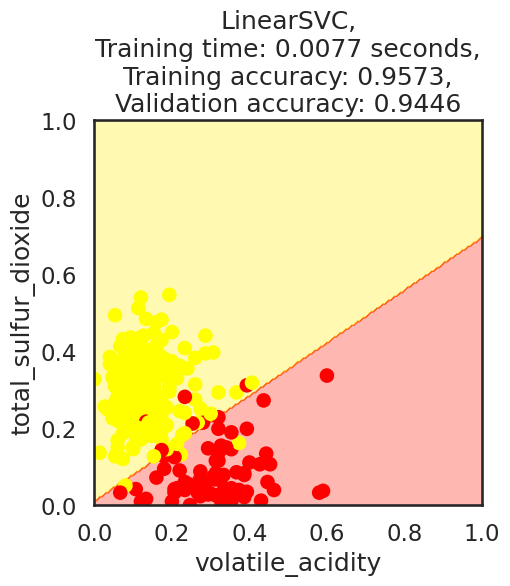

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

LSVC = LinearSVC()

# Measure the time it takes to train the model
start_time = time.time()
LSVC.fit(X_train, y_train)
training_time = time.time() - start_time

# Calculate the accuracy on the training and validation sets
train_accuracy = accuracy_score(y_train, LSVC.predict(X_train))
val_accuracy = accuracy_score(y_val, LSVC.predict(X_val))

print(f"Training time: {training_time:.4f} seconds")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print()

# Plot the decision boundary
X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)

ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title=f"LinearSVC,\nTraining time: {training_time:.4f} seconds,\nTraining accuracy: {train_accuracy:.4f},\nValidation accuracy: {val_accuracy:.4f}")

plt.show()

Gamma: 0.5, Training time: 0.1673 seconds
Gamma: 0.5, Training accuracy: 0.9577
Gamma: 0.5, Validation accuracy: 0.9431



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma: 1, Training time: 0.2597 seconds
Gamma: 1, Training accuracy: 0.9577
Gamma: 1, Validation accuracy: 0.9438



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma: 2, Training time: 0.1376 seconds
Gamma: 2, Training accuracy: 0.9579
Gamma: 2, Validation accuracy: 0.9423



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Gamma: 10, Training time: 0.1177 seconds
Gamma: 10, Training accuracy: 0.9581
Gamma: 10, Validation accuracy: 0.9431



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


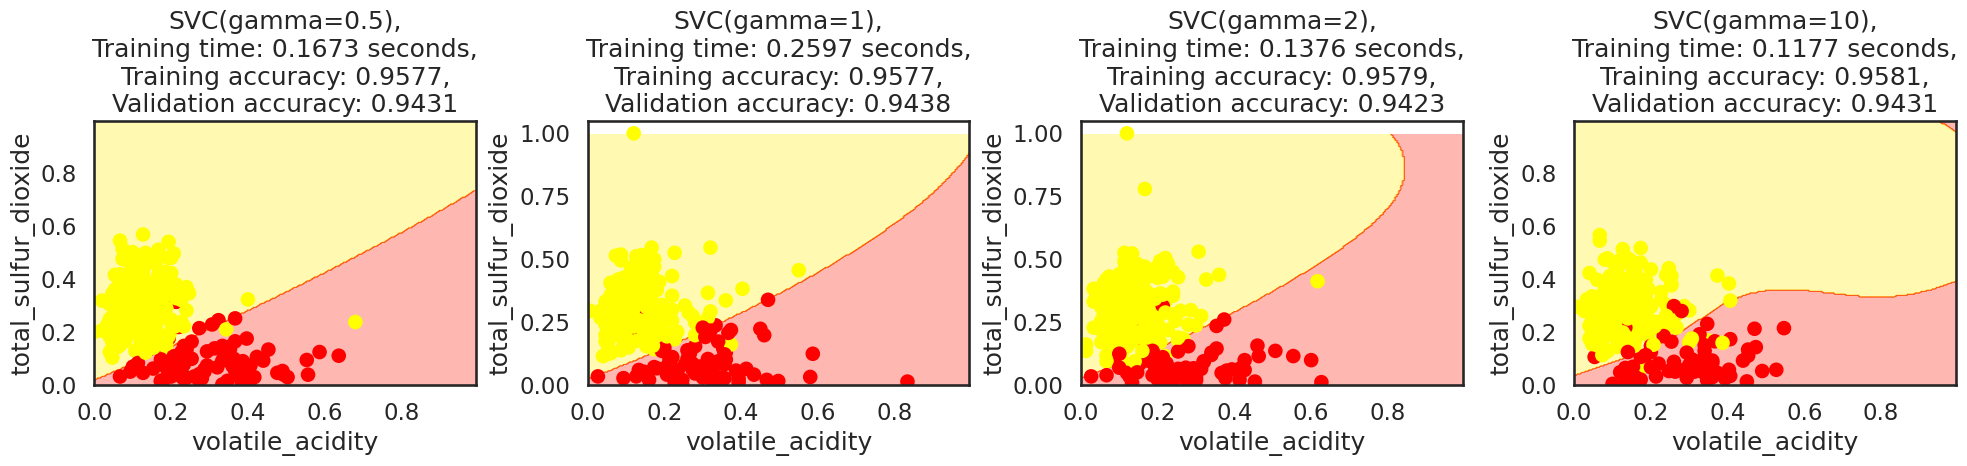

In [ ]:
#Changing Gamma values

from sklearn.svm import SVC

def plot_decision_boundary(estimator, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure the time it takes to train the model
    start_time = time.time()
    estimator.fit(X_train, y_train)
    training_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train, estimator.predict(X_train))
    val_accuracy = accuracy_score(y_val, estimator.predict(X_val))

# Print the training time, training accuracy, and validation accuracy
    print(f"Gamma: {estimator.gamma}, Training time: {training_time:.4f} seconds")
    print(f"Gamma: {estimator.gamma}, Training accuracy: {train_accuracy:.4f}")
    print(f"Gamma: {estimator.gamma}, Validation accuracy: {val_accuracy:.4f}")
    print()

  
# Plot the decision boundary
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=f"{estimator},\nTraining time: {training_time:.4f} seconds,\nTraining accuracy: {train_accuracy:.4f},\nValidation accuracy: {val_accuracy:.4f}")

gammas = [.5, 1, 2, 10]
n = len(gammas)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

for i, gamma in enumerate(gammas):
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y, axes[i])

plt.tight_layout()
plt.show()


C: 0.1, Training time: 0.1931 seconds
C: 0.1, Training accuracy: 0.9571
C: 0.1, Validation accuracy: 0.9415



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C: 1, Training time: 0.1403 seconds
C: 1, Training accuracy: 0.9579
C: 1, Validation accuracy: 0.9423



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C: 10, Training time: 0.2382 seconds
C: 10, Training accuracy: 0.9573
C: 10, Validation accuracy: 0.9431



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C: 15, Training time: 0.1308 seconds
C: 15, Training accuracy: 0.9573
C: 15, Validation accuracy: 0.9423



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


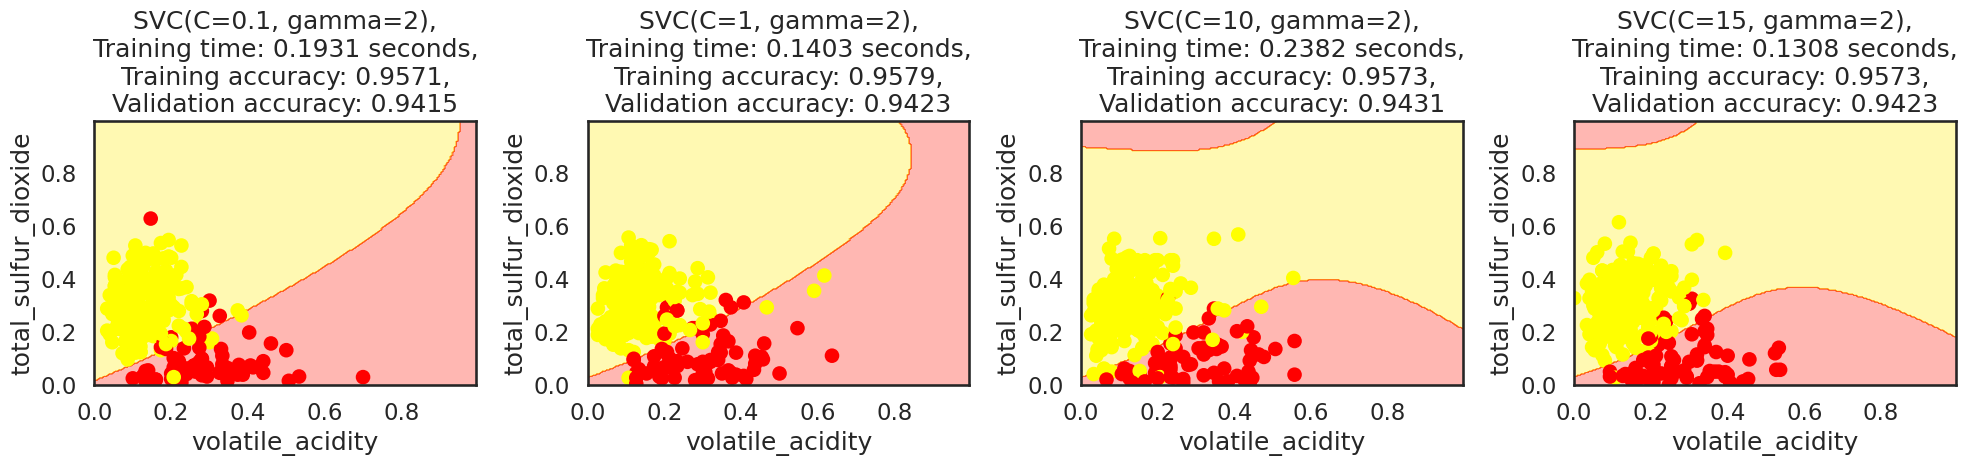

In [ ]:
#Changing C Value

def plot_decision_boundary(estimator, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure the time it takes to train the model
    start_time = time.time()
    estimator.fit(X_train, y_train)
    training_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train, estimator.predict(X_train))
    val_accuracy = accuracy_score(y_val, estimator.predict(X_val))

 # Print the training time, training accuracy, and validation accuracy
    print(f"C: {estimator.C}, Training time: {training_time:.4f} seconds")
    print(f"C: {estimator.C}, Training accuracy: {train_accuracy:.4f}")
    print(f"C: {estimator.C}, Validation accuracy: {val_accuracy:.4f}")
    print()

# Plot the decision boundary
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=f"{estimator},\nTraining time: {training_time:.4f} seconds,\nTraining accuracy: {train_accuracy:.4f},\nValidation accuracy: {val_accuracy:.4f}")


Cs = [.1, 1, 10, 15]
n = len(Cs)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

for i, C in enumerate(Cs):
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y, axes[i])

plt.tight_layout()
plt.show()


Training time: 0.0930 seconds
Training accuracy: 0.9582
Validation accuracy: 0.9454


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Nystroem was fitted with feature names
  warnings.warn(


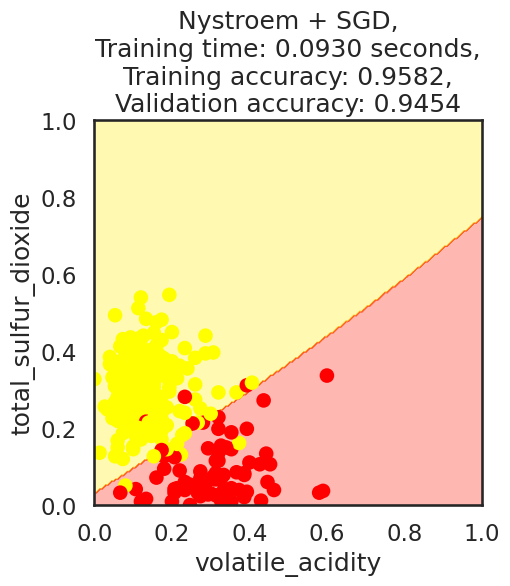

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

kwargs = {'kernel': 'rbf'}
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

# Fit the Nystroem transformer and transform the data
nystroem.fit(X_train)
X_train_transformed = nystroem.transform(X_train)
X_val_transformed = nystroem.transform(X_val)

# Measure the time it takes to train the model
start_time = time.time()
sgd.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

# Calculate the accuracy on the training and validation sets
train_accuracy = accuracy_score(y_train, sgd.predict(X_train_transformed))
val_accuracy = accuracy_score(y_val, sgd.predict(X_val_transformed))

print(f"Training time: {training_time:.4f} seconds")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

# Plot the decision boundary
X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
X_grid_transformed = nystroem.transform(X_grid)
y_grid_predictions = sgd.predict(X_grid_transformed)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5, 5))
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    title=f"Nystroem + SGD,\nTraining time: {training_time:.4f} seconds,\nTraining accuracy: {train_accuracy:.4f},\nValidation accuracy: {val_accuracy:.4f}")

plt.show()


Training time: 0.0928 seconds
Training accuracy: 0.9569
Validation accuracy: 0.9462


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RBFSampler was fitted with feature names
  warnings.warn(


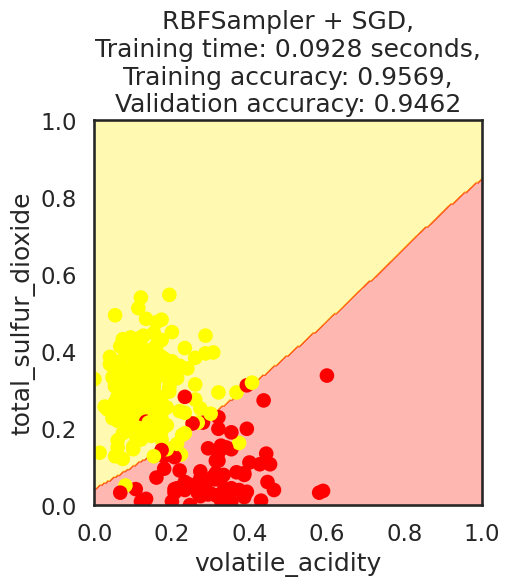

In [ ]:
from sklearn.kernel_approximation import RBFSampler


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rbf_sampler = RBFSampler()
sgd = SGDClassifier()

# Fit the RBFSampler and transform the data
rbf_sampler.fit(X_train)
X_train_transformed = rbf_sampler.transform(X_train)
X_val_transformed = rbf_sampler.transform(X_val)

# Measure the time it takes to train the model
start_time = time.time()
sgd.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

# Calculate the accuracy on the training and validation sets
train_accuracy = accuracy_score(y_train, sgd.predict(X_train_transformed))
val_accuracy = accuracy_score(y_val, sgd.predict(X_val_transformed))

print(f"Training time: {training_time:.4f} seconds")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

# Plot the decision boundary
X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')

x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
X_grid_transformed = rbf_sampler.transform(X_grid)
y_grid_predictions = sgd.predict(X_grid_transformed)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5, 5))
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    title=f"RBFSampler + SGD,\nTraining time: {training_time:.4f} seconds,\nTraining accuracy: {train_accuracy:.4f},\nValidation accuracy: {val_accuracy:.4f}")

plt.show()

In [ ]:
#summary table
data = {
    'Model': ['LinearSVC', 'Gamma: 0.5', 'Gamma: 1', 'Gamma: 2', 'Gamma: 10', 'C: 0.1', 'C: 1', 'C: 10', 'C: 15', 'Nystroem+SGD', 'RBFSampler+SGD'],
    'Training Time': [0.0077, 0.1673, 0.2597, 0.1376, 0.1177, 0.1931, 0.1403, 0.2382, 0.1308, 0.093, 0.0928],
    'Training Accuracy': [0.9573, 0.9577, 0.9577, 0.9579, 0.9581, 0.9571, 0.9579, 0.9573, 0.9573, 0.9582, 0.9569],
    'Validation Accuracy': [0.9446, 0.9431, 0.9438, 0.9423, 0.9431, 0.9415, 0.9423, 0.9431, 0.9423, 0.9454, 0.9462]
}

df = pd.DataFrame(data)
print(df)

             Model  Training Time  Training Accuracy  Validation Accuracy
0        LinearSVC         0.0077             0.9573               0.9446
1       Gamma: 0.5         0.1673             0.9577               0.9431
2         Gamma: 1         0.2597             0.9577               0.9438
3         Gamma: 2         0.1376             0.9579               0.9423
4        Gamma: 10         0.1177             0.9581               0.9431
5           C: 0.1         0.1931             0.9571               0.9415
6             C: 1         0.1403             0.9579               0.9423
7            C: 10         0.2382             0.9573               0.9431
8            C: 15         0.1308             0.9573               0.9423
9     Nystroem+SGD         0.0930             0.9582               0.9454
10  RBFSampler+SGD         0.0928             0.9569               0.9462


Increasing gamma values can lead to higher model complexity and better accuracy, but it can also result in longer fitting times. The effect of C values on fitting time is not consistent, but higher C values generally result in better training accuracy as the model becomes more sensitive to classification errors. However, increasing C values too much may lead to overfitting.

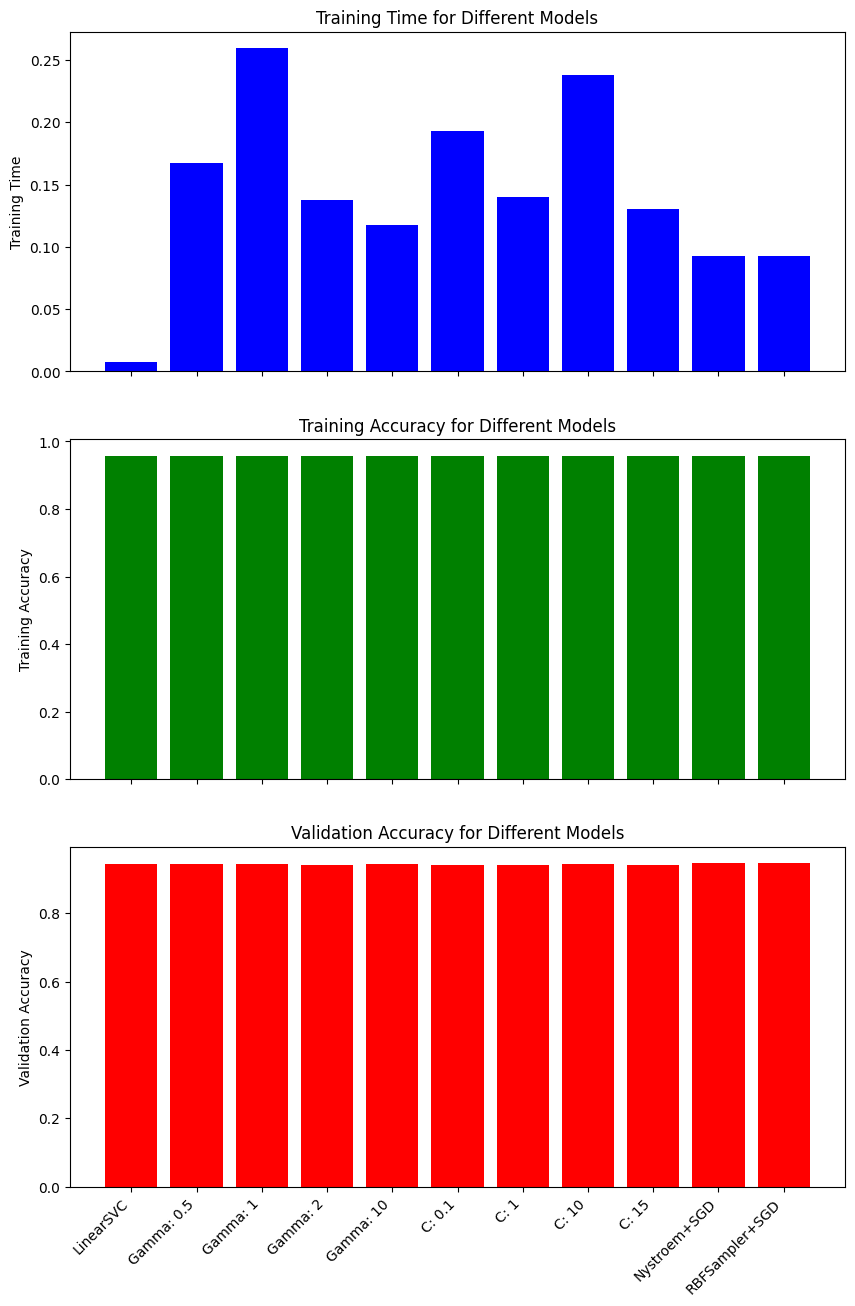

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['LinearSVC', 'Gamma: 0.5', 'Gamma: 1', 'Gamma: 2', 'Gamma: 10', 'C: 0.1', 'C: 1', 'C: 10', 'C: 15', 'Nystroem+SGD', 'RBFSampler+SGD'],
    'Training Time': [0.0077, 0.1673, 0.2597, 0.1376, 0.1177, 0.1931, 0.1403, 0.2382, 0.1308, 0.093, 0.0928],
    'Training Accuracy': [0.9573, 0.9577, 0.9577, 0.9579, 0.9581, 0.9571, 0.9579, 0.9573, 0.9573, 0.9582, 0.9569],
    'Validation Accuracy': [0.9446, 0.9431, 0.9438, 0.9423, 0.9431, 0.9415, 0.9423, 0.9431, 0.9423, 0.9454, 0.9462]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

ax[0].bar(df['Model'], df['Training Time'], color='b')
ax[0].set_ylabel('Training Time')
ax[0].set_title('Training Time for Different Models')

ax[1].bar(df['Model'], df['Training Accuracy'], color='g')
ax[1].set_ylabel('Training Accuracy')
ax[1].set_title('Training Accuracy for Different Models')

ax[2].bar(df['Model'], df['Validation Accuracy'], color='r')
ax[2].set_ylabel('Validation Accuracy')
ax[2].set_title('Validation Accuracy for Different Models')

plt.xticks(rotation=45, ha='right')
plt.show()
